In [15]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("TS Transport Sales").getOrCreate()

df = spark.read.csv("ts_transport_online_sales_01_08_2025to31_08_2025_0.csv",
                    header=True, inferSchema=True)
df.show()

+--------------------+----------+--------------------+--------------------+--------+------------+-------------+----------------------+-------------+--------------------+--------------------+--------+--------+
|           modelDesc|      fuel|              colour|        vehicleClass|makeYear|seatCapacity|secondVehicle|tempRegistrationNumber|     category|           makerName|            OfficeCd|fromdate|  todate|
+--------------------+----------+--------------------+--------------------+--------+------------+-------------+----------------------+-------------+--------------------+--------------------+--------+--------+
|    RIZTA S MX06 BOV|   BATTERY|     PANGONG-BLUE MT|         MOTOR CYCLE| 00:00.0|           2|            Y|           TG21ATR1861|Non Transport|M/S. ATHER ENERGY...|        RTA JAGITYAL|01/08/25|01/08/25|
|PULSAR - 125 BSVI...|    PETROL|E BLACK WITH PLAT...|         MOTOR CYCLE| 00:00.0|           2|            N|           TG01ATR5634|Non Transport|      BAJAJ AUTO

In [ ]:
# Here the  whole Telangana transport dataset is Displayed
# It is between Aug month 2025
# It inclides all types of vechiles//

In [16]:
df.printSchema()


root
 |-- modelDesc: string (nullable = true)
 |-- fuel: string (nullable = true)
 |-- colour: string (nullable = true)
 |-- vehicleClass: string (nullable = true)
 |-- makeYear: string (nullable = true)
 |-- seatCapacity: integer (nullable = true)
 |-- secondVehicle: string (nullable = true)
 |-- tempRegistrationNumber: string (nullable = true)
 |-- category: string (nullable = true)
 |-- makerName: string (nullable = true)
 |-- OfficeCd: string (nullable = true)
 |-- fromdate: string (nullable = true)
 |-- todate: string (nullable = true)



In [ ]:
# Here the info is Displayed//

In [17]:
from pyspark.sql.functions import col, sum

missing_counts = df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])
missing_counts.show()


+---------+----+------+------------+--------+------------+-------------+----------------------+--------+---------+--------+--------+------+
|modelDesc|fuel|colour|vehicleClass|makeYear|seatCapacity|secondVehicle|tempRegistrationNumber|category|makerName|OfficeCd|fromdate|todate|
+---------+----+------+------------+--------+------------+-------------+----------------------+--------+---------+--------+--------+------+
|        0|1090|     0|           0|       0|           0|            0|                     0|       0|        0|       0|       0|     0|
+---------+----+------+------------+--------+------------+-------------+----------------------+--------+---------+--------+--------+------+



In [ ]:
# Checking of missing values//

In [18]:
before = df.count()
df = df.dropDuplicates()
after = df.count()
print("Duplicates Removed:", before - after)


Duplicates Removed: 0


In [ ]:
# Removing the Duplicates//

In [19]:
from pyspark.sql.functions import count

df.groupBy("vehicleClass") \
  .agg(count("*").alias("vehicle")) \
  .orderBy("vehicle", ascending=False) \
  .show(truncate=False)

+------------------------------------------+-------+
|vehicleClass                              |vehicle|
+------------------------------------------+-------+
|MOTOR CYCLE                               |52281  |
|MOTOR CAR                                 |10835  |
|Auto Rickshaw                             |10310  |
|Goods Carriage                            |1899   |
|Motor Cab                                 |1790   |
|Tractor for Agricultural Purpose          |914    |
|Trailer For Commercial Use                |641    |
|Three Wheeled Goods Vehicle               |554    |
|Trailer for Agriculture Purpose           |522    |
|Tractor for Commercial Use                |521    |
|Chassis Transport                         |342    |
|Ominibus                                  |159    |
|Motor Cycle for Hire                      |103    |
|Omnibus for Private Use                   |95     |
|Maxi Cab                                  |85     |
|Vehicle Fitted with Construction Equipment|84

In [ ]:
# Showing the types of vechiles along with its Count//

In [20]:
from pyspark.sql.functions import count

df.groupBy("modelDesc") \
  .agg(count("*").alias("vehicle")) \
  .orderBy("vehicle", ascending=False) \
  .show(truncate=False)


+-------------------------------------------+-------+
|modelDesc                                  |vehicle|
+-------------------------------------------+-------+
|BAJAJ RE LPG 4S BSVI-PH2B                  |5325   |
|ACTIVA-STD. BSVI-PH2                       |3675   |
|ACTIVA 125 DISC. BSVI-PH2                  |3328   |
|BAJAJ RE CNG 4S FI BSVI-PH2B               |2532   |
|UNICORN. BSVI-PH2                          |2113   |
|ACTIVA-DLX. BSVI-PH2                       |2000   |
|PASSION + I 3S DRS BSVI-PH2                |1856   |
|TVS JUPITER 113 BSVI-PH2                   |1624   |
|TVS XL100 HEAVY DUTY I-TOUCH START BSVI-PH2|1546   |
|SHINE 125 DRUM. BSVI-PH2                   |1455   |
|TVS - JUPITER 125 BSVI-PH2B                |1365   |
|TVS RAIDER BSVI-PH2                        |1031   |
|PULSAR 150 DTS-I BSVI-PH2B                 |1010   |
|CLASSIC 350 BSVI-PH2                       |988    |
|TVS JUPITER 125 BSVI-PH2                   |890    |
|SP 125  DLX DISK BSVI-PH2  

In [ ]:
# Displayed the MotorCycles Count with its model names//

In [21]:
from pyspark.sql.functions import count

df.groupBy("modelDesc") \
  .agg(count("*").alias("vehicle")) \
  .orderBy("vehicle", desending=True) \
  .show(truncate=False)

+--------------------------------------------------+-------+
|modelDesc                                         |vehicle|
+--------------------------------------------------+-------+
|LOEV+ BOV                                         |1      |
|MARUTIGRANDVITARASMTHYBRIDALPHA1.5L 5MT BSVI-PH2B |1      |
|MINI COUNTRYMAN E BOV                             |1      |
|TATA ACE HT + D CLB LOWDECK LOAD BODY BSVI-PH2    |1      |
|NISSAN . MAGNITE TURBO CVT XV BSVI-PH2            |1      |
|HARRIER M BS6 D ADV X BSVI-PH2                    |1      |
|MARUTI BREZZA VXI (O) 1.5 L 5-MT BSVI-PH2         |1      |
|MF 30 DT ORCHARD PLUS BSIIIA                      |1      |
|PARTNER PLS-CC-AC BSVI-PH2                        |1      |
|AUDI RSQ8 4.0 TFSI QUATTRO BSVI-PH2               |1      |
|BADA DOST I4TADD-FSD-LB-AC BSVI-PH2               |1      |
|BOL MAXX PUP HD 2.0L LX CBC BSVI-PH2              |1      |
|TOYOTA RUMION G PETROL (AT) BSVI-PH2              |1      |
|VENUE N LINE N6 1.0 TUR

In [ ]:
# Displayed the Cars Count with its model names//

In [22]:
df.select("fuel").distinct().show()


+---------------+
|           fuel|
+---------------+
|             -1|
|        BATTERY|
|         DIESEL|
|            CNG|
|         PETROL|
|     CNG PETROL|
|     PETROL LPG|
|            LPG|
|PETROL ELECTRIC|
|           NULL|
+---------------+



In [ ]:
# Here are the types of vechiles running based on fuel category//

In [23]:
from pyspark.sql.functions import count

df.groupBy("fuel") \
  .agg(count("*").alias("vehicle")) \
  .orderBy("vehicle", ascending=False) \
  .show(truncate=False)


+---------------+-------+
|fuel           |vehicle|
+---------------+-------+
|PETROL         |54862  |
|DIESEL         |7271   |
|BATTERY        |6745   |
|LPG            |5545   |
|CNG            |2898   |
|CNG PETROL     |2676   |
|NULL           |1090   |
|PETROL LPG     |106    |
|PETROL ELECTRIC|76     |
|-1             |13     |
+---------------+-------+



In [ ]:
# Shows the no.of vechiles belongs to fuel type//

In [24]:
from pyspark.sql.functions import count

df.groupBy("OfficeCd") \
  .agg(count("*").alias("vehicles")) \
  .orderBy("vehicles", ascending=False) \
  .show(truncate=False)

+------------------------+--------+
|OfficeCd                |vehicles|
+------------------------+--------+
|RTA RANGAREDDY          |8762    |
|RTA MEDCHAL             |5584    |
|RTA-HYDERABAD-CZ        |5523    |
|RTA UPPAL               |5265    |
|RTA IBRAHIMPATNAM       |5048    |
|RTA-HYDERABAD-SZ        |4760    |
|RTA-HYDERABAD-WZ        |3931    |
|RTA-HYDERABAD-EZ        |3891    |
|RTA-HYDERABAD-NZ        |2879    |
|UNIT OFFICE KUKATPALLY  |2580    |
|UNIT OFFICE PATANCHERUVU|1788    |
|RTA KHAMMAM             |1508    |
|RTA NALGONDA            |1370    |
|RTA HANUMAKONDA         |1327    |
|RTA MAHABOOBNAGAR       |1231    |
|RTA NIZAMABAD           |1216    |
|RTA WARANGAL            |1168    |
|RTA KARIMNAGAR          |1153    |
|RTA SANGAREDDY          |1142    |
|RTA YADADRI             |1139    |
+------------------------+--------+
only showing top 20 rows



In [ ]:
# Showing the no.of vechiles registered areas means officeId//

In [25]:
df.groupBy("colour").count().show()

+--------------------+-----+
|              colour|count|
+--------------------+-----+
|       STEALTH BLACK|  860|
|           BLUEWHITE|   24|
|      SUPERNOVA BLUE|    8|
|BLACK-RED PURPLE ...|    5|
|     PANGONG BLUE DT|   58|
|          STORM GREY|   66|
|          ECO GREEEN|    9|
|         WHITE AZURE|   10|
|       ORANGE&YELLOW|    1|
|              T.GREY|  250|
|      GOLEDEN YELLOW|    1|
|      EBONY BLK BLUE|   36|
|          CYAN STORM|    5|
|PEARL FADELESS WHITE|    2|
|        GLOSSY WHITE|    1|
|    MET GRANITE GRAY|    2|
|      FIREBALL BLACK|   47|
| EBONY BLACK ( MET )|    7|
|          WEGO WHITE|   52|
|                 BRB|    8|
+--------------------+-----+
only showing top 20 rows



In [ ]:
# Here we see colours of vechiles with  thete count//

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [27]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, when
spark = SparkSession.builder.appName("TS Transport Sales").getOrCreate()


df = spark.read.csv("ts_transport_online_sales_01_08_2025to31_08_2025_0.csv", 
                    header=True, inferSchema=True)

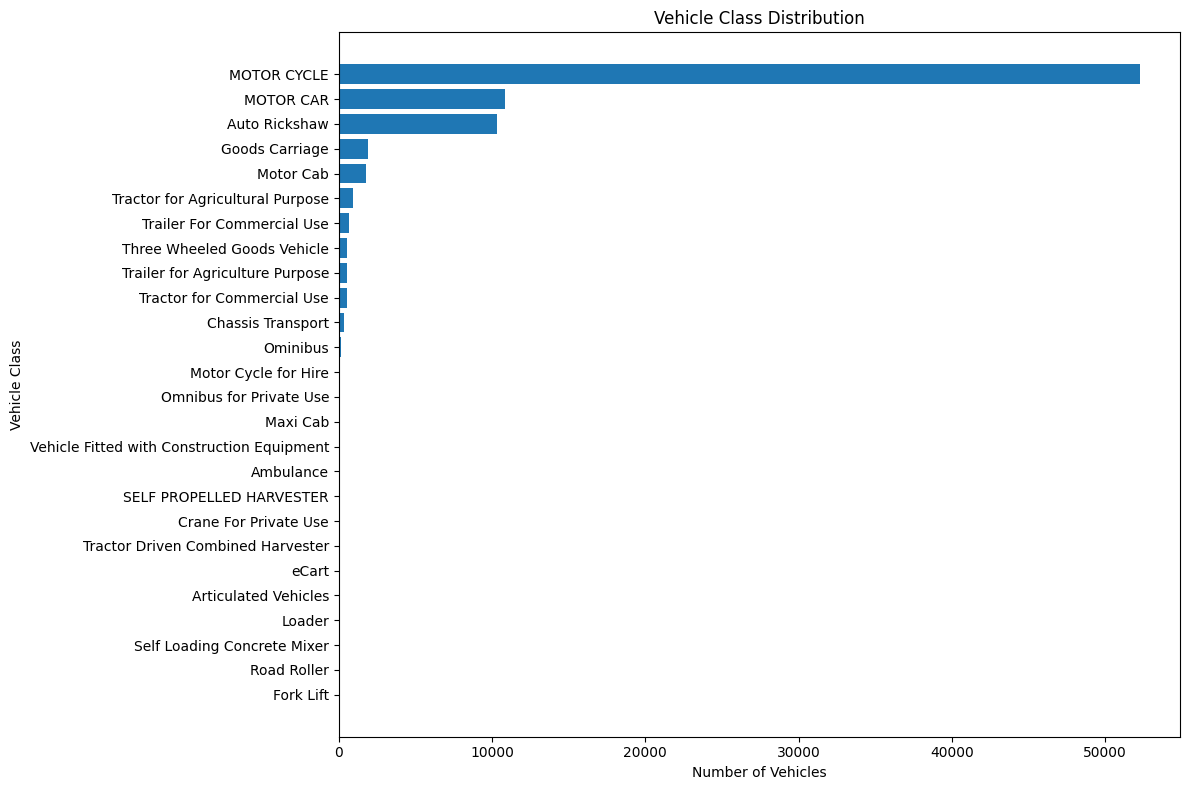

In [28]:

vehicle_class_df = df.groupBy("vehicleClass").agg(count("*").alias("count")).orderBy("count", ascending=False)
vehicle_class_pd = vehicle_class_df.toPandas()
plt.figure(figsize=(12, 8))
plt.barh(vehicle_class_pd['vehicleClass'], vehicle_class_pd['count'])
plt.xlabel('Number of Vehicles')
plt.ylabel('Vehicle Class')
plt.title('Vehicle Class Distribution')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

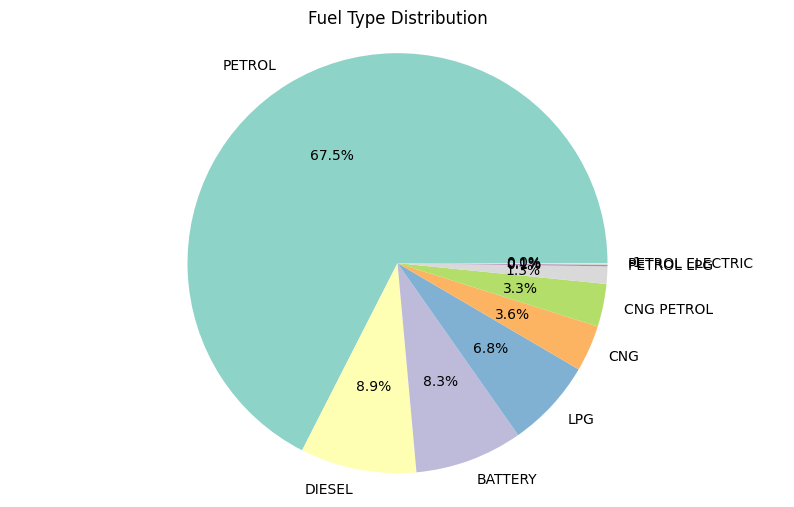

In [29]:
fuel_df = df.groupBy("fuel").agg(count("*").alias("count")).orderBy("count", ascending=False)
fuel_pd = fuel_df.toPandas()
plt.figure(figsize=(10, 6))
colors = plt.cm.Set3(np.linspace(0, 1, len(fuel_pd)))
plt.pie(fuel_pd['count'], labels=fuel_pd['fuel'], autopct='%1.1f%%', colors=colors)
plt.title('Fuel Type Distribution')
plt.axis('equal')
plt.show()

In [ ]:
# Fuel Type Distribution//

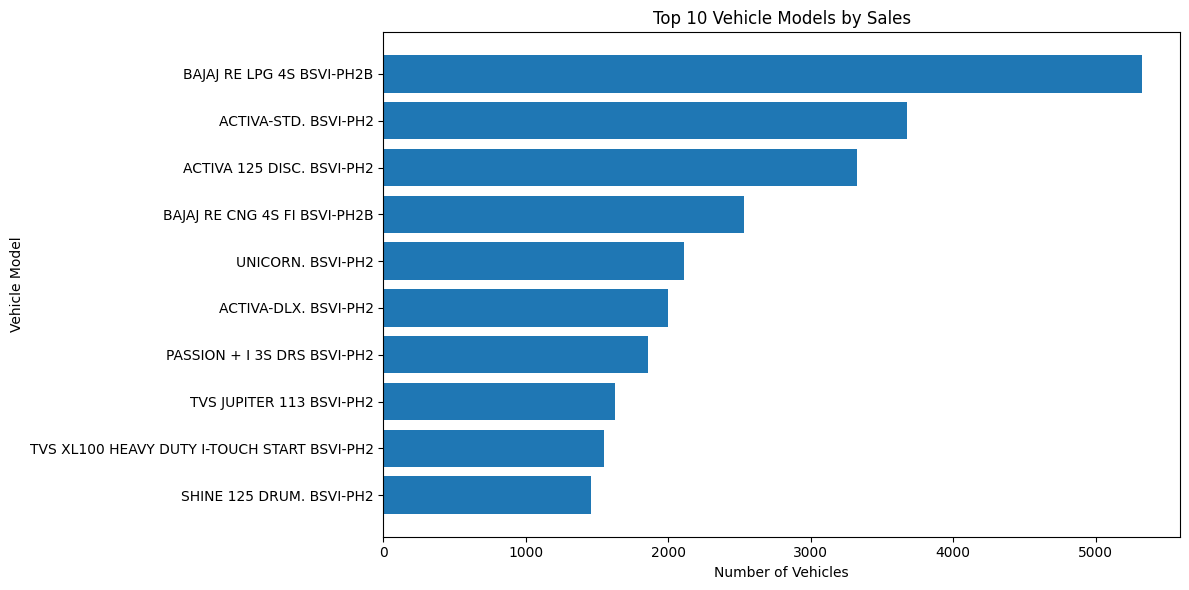

In [30]:

top_models_df = df.groupBy("modelDesc").agg(count("*").alias("count")).orderBy("count", ascending=False).limit(10)
top_models_pd = top_models_df.toPandas()
plt.figure(figsize=(12, 6))
plt.barh(top_models_pd['modelDesc'], top_models_pd['count'])
plt.xlabel('Number of Vehicles')
plt.ylabel('Vehicle Model')
plt.title('Top 10 Vehicle Models by Sales')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
# Top 10 Vehicle Models

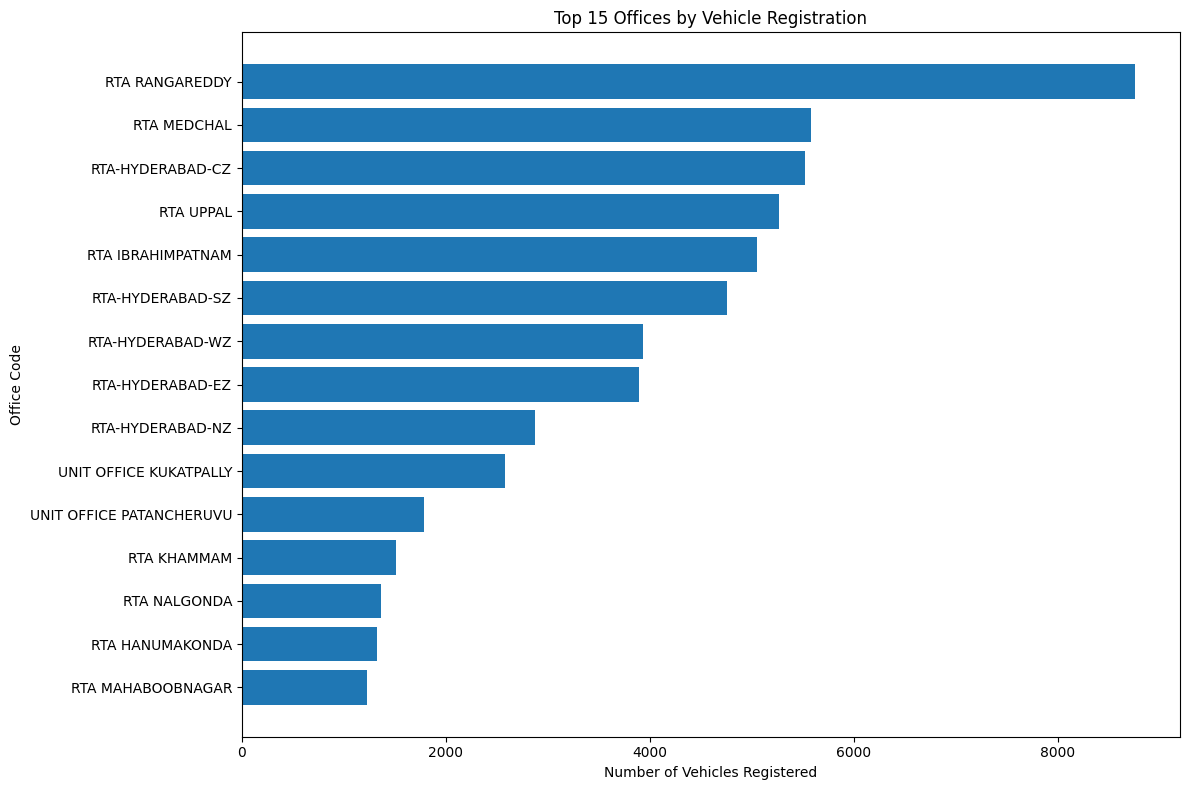

In [31]:
office_df = df.groupBy("OfficeCd").agg(count("*").alias("count")).orderBy("count", ascending=False).limit(15)
office_pd = office_df.toPandas()
plt.figure(figsize=(12, 8))
plt.barh(office_pd['OfficeCd'], office_pd['count'])
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Office Code')
plt.title('Top 15 Offices by Vehicle Registration')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
# Top 15 Offices by Vehicle Registration//

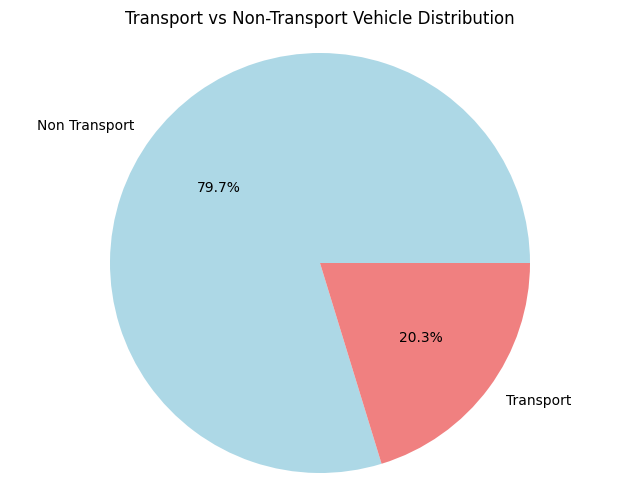

In [32]:
category_df = df.groupBy("category").agg(count("*").alias("count"))
category_pd = category_df.toPandas()
plt.figure(figsize=(8, 6))
plt.pie(category_pd['count'], labels=category_pd['category'], autopct='%1.1f%%', 
        colors=['lightblue', 'lightcoral'])
plt.title('Transport vs Non-Transport Vehicle Distribution')
plt.axis('equal')
plt.show()

In [ ]:
# Category Distribution (Transport vs Non-Transport)//

<Figure size 1200x800 with 0 Axes>

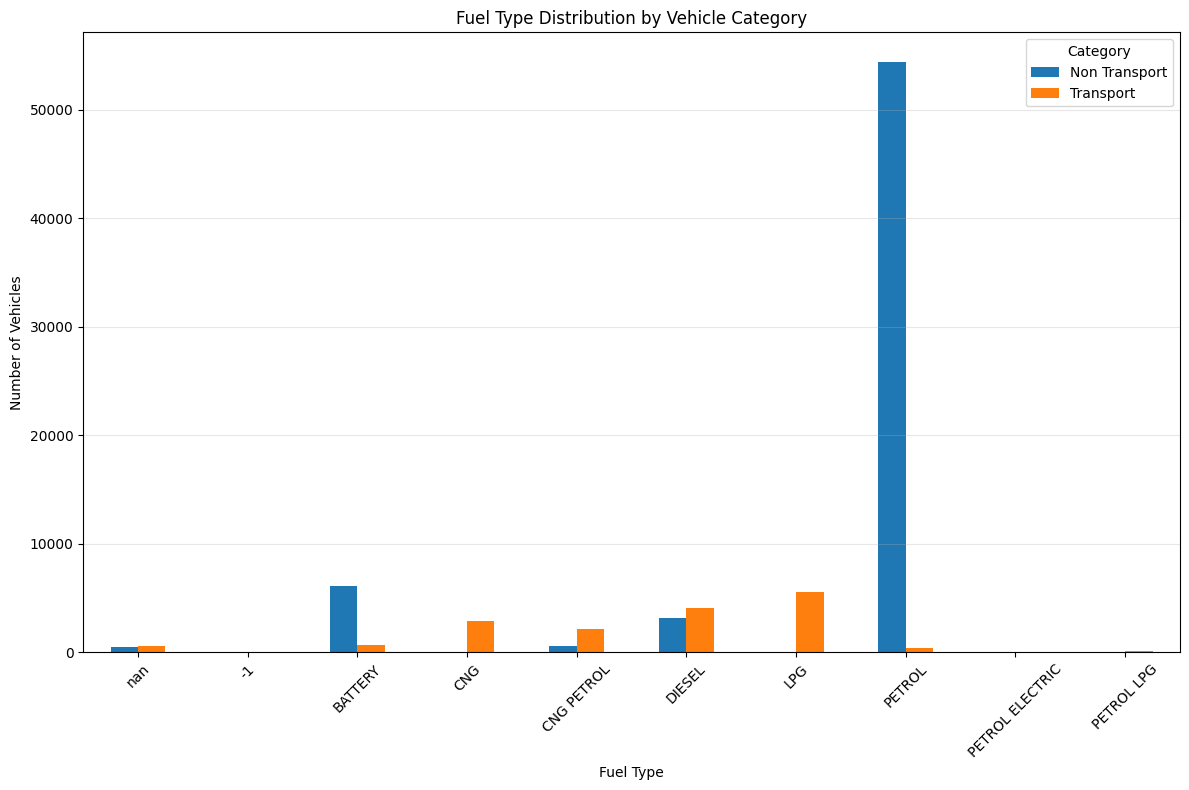

In [33]:

fuel_category_df = df.groupBy("fuel", "category").agg(count("*").alias("count"))
fuel_category_pd = fuel_category_df.toPandas()
pivot_df = fuel_category_pd.pivot(index='fuel', columns='category', values='count').fillna(0)
plt.figure(figsize=(12, 8))
pivot_df.plot(kind='bar', figsize=(12, 8))
plt.title('Fuel Type Distribution by Vehicle Category')
plt.xlabel('Fuel Type')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Fuel Type by Category
# Pivot for better visualization//

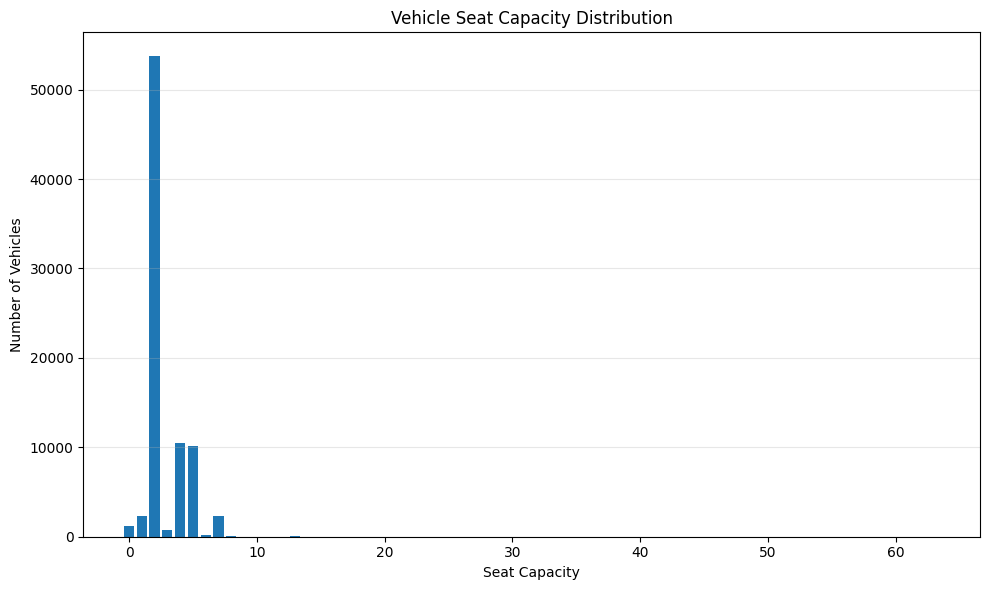

In [34]:
seat_capacity_df = df.groupBy("seatCapacity").agg(count("*").alias("count")).orderBy("seatCapacity")
seat_capacity_pd = seat_capacity_df.toPandas()
plt.figure(figsize=(10, 6))
plt.bar(seat_capacity_pd['seatCapacity'], seat_capacity_pd['count'])
plt.xlabel('Seat Capacity')
plt.ylabel('Number of Vehicles')
plt.title('Vehicle Seat Capacity Distribution')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Seat Capacity Distribution//

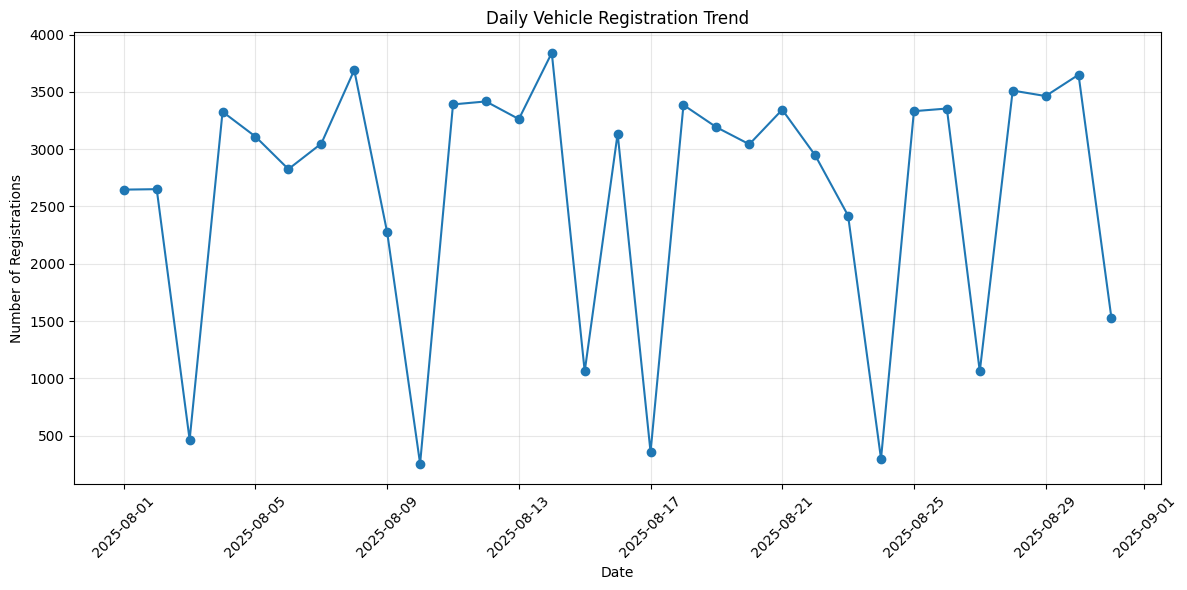

In [35]:

from pyspark.sql.functions import to_date


try:
    df_with_date = df.withColumn("fromdate_parsed", to_date(col("fromdate"), "dd/MM/yy"))
    daily_sales = df_with_date.groupBy("fromdate_parsed").count().orderBy("fromdate_parsed")
    daily_sales_pd = daily_sales.toPandas()
    
    plt.figure(figsize=(12, 6))
    plt.plot(daily_sales_pd['fromdate_parsed'], daily_sales_pd['count'], marker='o')
    plt.xlabel('Date')
    plt.ylabel('Number of Registrations')
    plt.title('Daily Vehicle Registration Trend')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
except:
    print("Date conversion not possible with current format")

In [ ]:
# Convert date columns and analyze trends
# If you want to analyze daily trends//

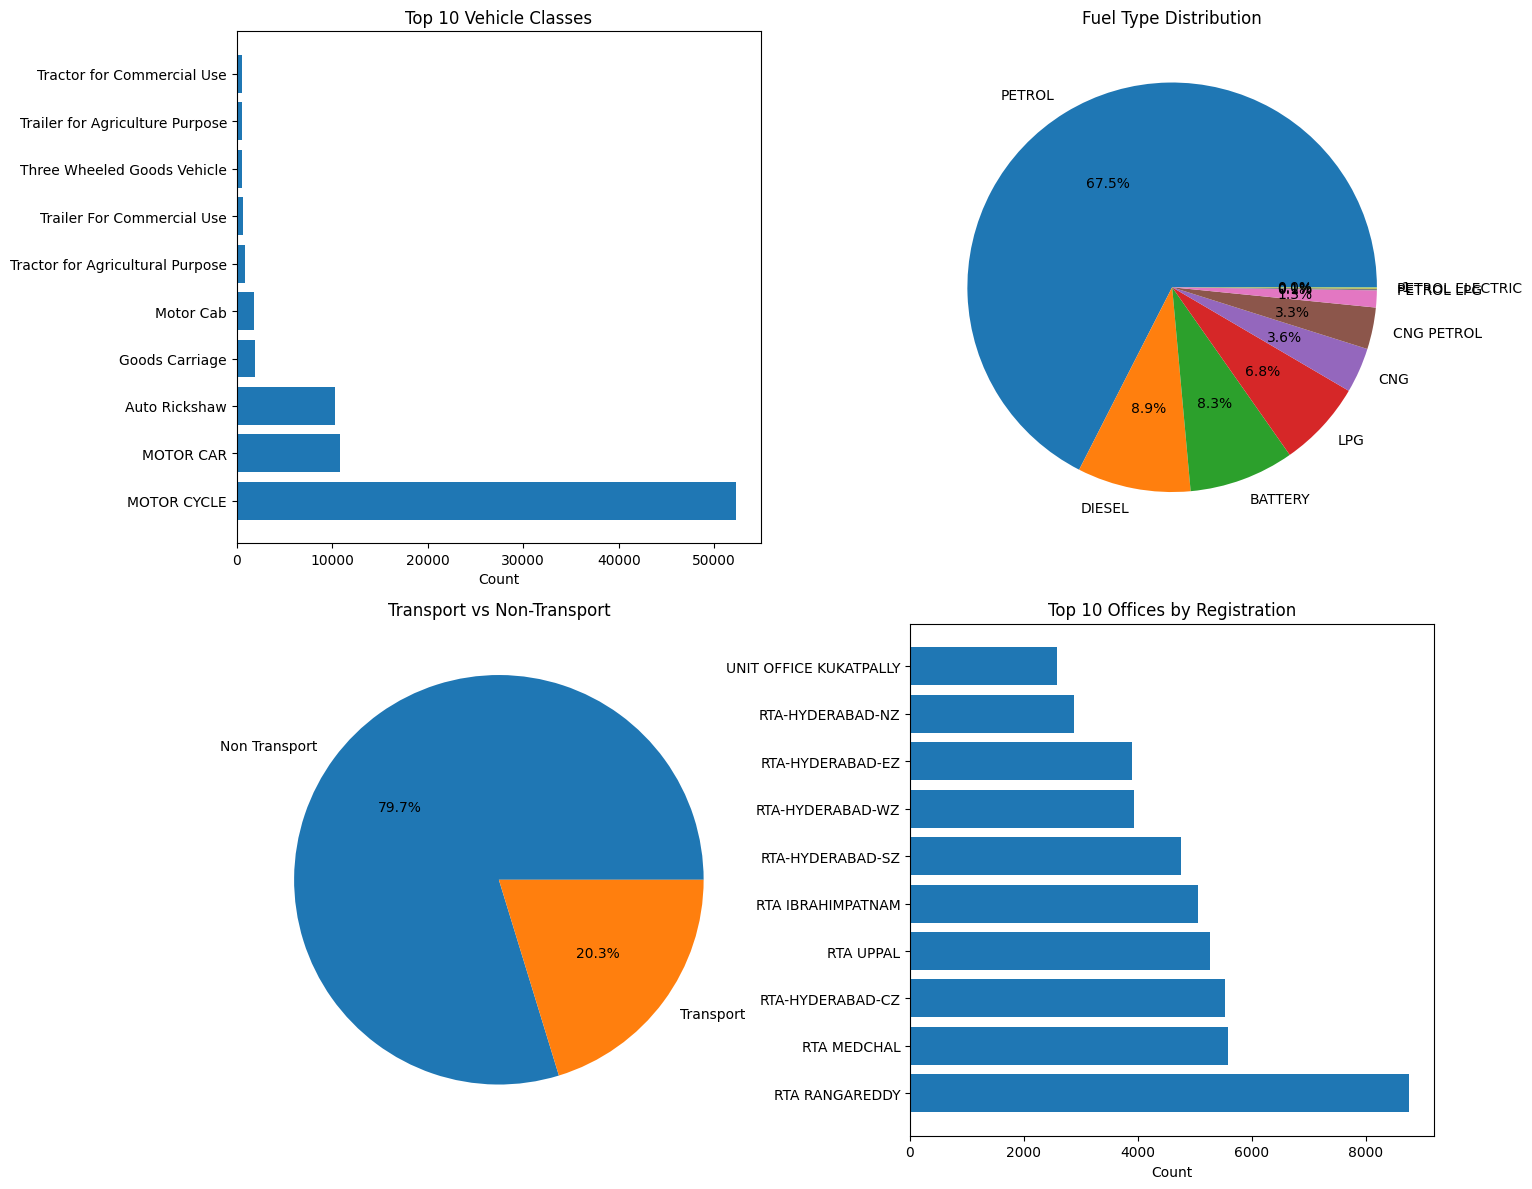

In [36]:

fig, axes = plt.subplots(2, 2, figsize=(15, 12))


vehicle_class_top10 = vehicle_class_pd.head(10)
axes[0, 0].barh(vehicle_class_top10['vehicleClass'], vehicle_class_top10['count'])
axes[0, 0].set_title('Top 10 Vehicle Classes')
axes[0, 0].set_xlabel('Count')


axes[0, 1].pie(fuel_pd['count'], labels=fuel_pd['fuel'], autopct='%1.1f%%')
axes[0, 1].set_title('Fuel Type Distribution')


axes[1, 0].pie(category_pd['count'], labels=category_pd['category'], autopct='%1.1f%%')
axes[1, 0].set_title('Transport vs Non-Transport')


office_top10 = office_pd.head(10)
axes[1, 1].barh(office_top10['OfficeCd'], office_top10['count'])
axes[1, 1].set_title('Top 10 Offices by Registration')
axes[1, 1].set_xlabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
# Create a dashboard with multiple plots
# Plot 2: Fuel Type
# Plot 3: Category Distribution
# Plot 4: Top Offices//

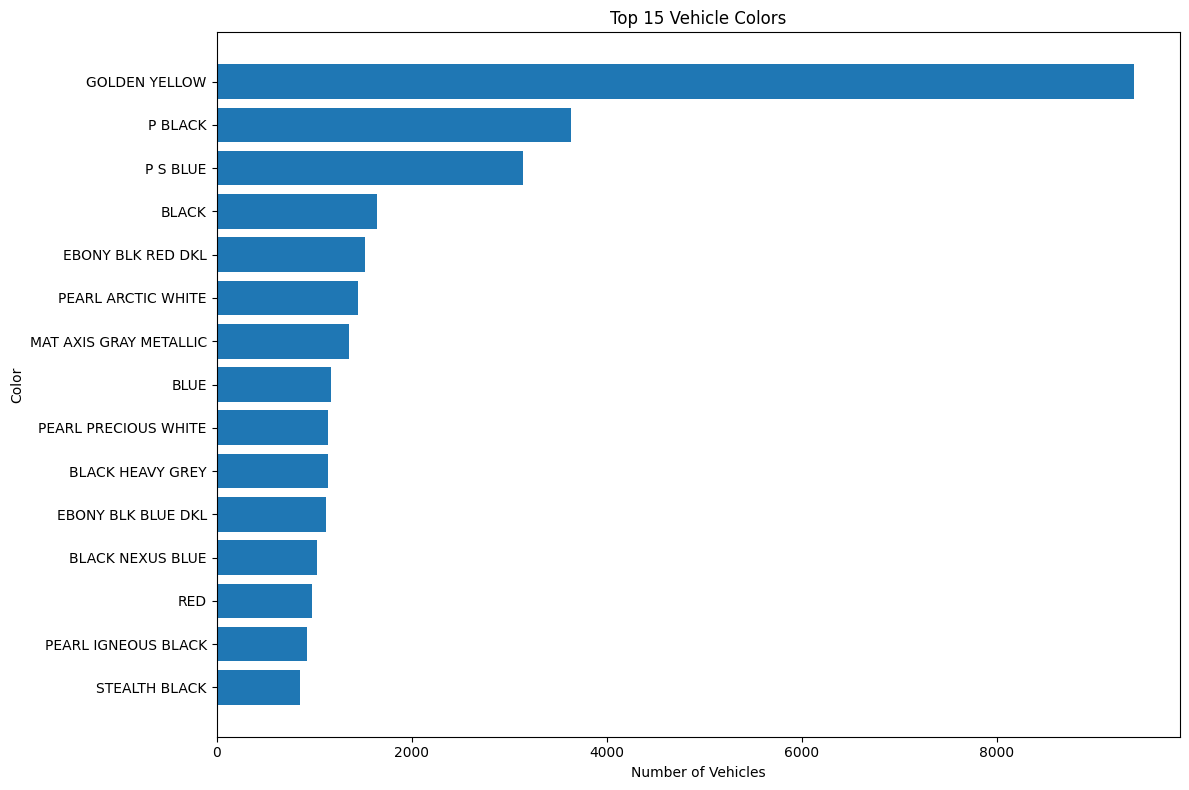

In [37]:
color_df = df.groupBy("colour").agg(count("*").alias("count")).orderBy("count", ascending=False).limit(15)
color_pd = color_df.toPandas()
plt.figure(figsize=(12, 8))
plt.barh(color_pd['colour'], color_pd['count'])
plt.xlabel('Number of Vehicles')
plt.ylabel('Color')
plt.title('Top 15 Vehicle Colors')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
# Top Vehicle Colors